<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Задание" data-toc-modified-id="1.-Задание-1">1. Задание</a></span><ul class="toc-item"><li><span><a href="#GD---Градиентный-спуск-(Gradient-Descent)" data-toc-modified-id="GD---Градиентный-спуск-(Gradient-Descent)-1.1">GD - Градиентный спуск (Gradient Descent)</a></span></li><li><span><a href="#SGD---Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent)" data-toc-modified-id="SGD---Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent)-1.2">SGD - Стохастический градиентный спуск (Stochastic Gradient Descent)</a></span></li><li><span><a href="#Mini-batch-Gradient-Descent" data-toc-modified-id="Mini-batch-Gradient-Descent-1.3">Mini-batch Gradient Descent</a></span></li><li><span><a href="#График-MSE" data-toc-modified-id="График-MSE-1.4">График MSE</a></span></li></ul></li><li><span><a href="#2-Задание" data-toc-modified-id="2-Задание-2">2 Задание</a></span></li><li><span><a href="#3-Задание" data-toc-modified-id="3-Задание-3">3 Задание</a></span></li><li><span><a href="#4-Задание" data-toc-modified-id="4-Задание-4">4 Задание</a></span></li><li><span><a href="#5-Задание" data-toc-modified-id="5-Задание-5">5 Задание</a></span></li></ul></div>

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска (GD) и (стохастического градиентного спуска (SGD) или mini-batch градиентного спуска). Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  
3. [\*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.
4. [\*] Построить график изменения весов от числа итераций при GD и SGD (или mini-batch GD) на одном рисунке.
5. [\*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

## 1. Задание

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска (GD) и (стохастического градиентного спуска (SGD) или mini-batch градиентного спуска). Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [2]:
X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1, 
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [3]:
coef

array([87.73730719, 74.07686178])

In [4]:
# Метод наименьших квадратов
np.linalg.inv(X.T @ X) @ X.T @ y

array([86.85290273, 74.10093365])

### GD - Градиентный спуск (Gradient Descent)

In [5]:
def mse(X, w, y):
    y_pred = X.dot(w)
    sse = np.sum((y - y_pred)**2) 
    return sse / len(y)

def GradientDescent(X, y, alpha=1e-3, min_weight_dist=1e-5, max_iter=1e5, l1=0, l2=0, seed=42):
    '''Реализация градиентного спуска
    Параметры:
        X (np.array) - массив признаков
        y (np.array) - вектор ответов
        alpha (float) - скорость обучения
        min_weight_dist (float) - критерий сходимости 
            (разница весов, при которой алгоритм останавливается) 
        max_iter (int) - максимальное количество итераций
        l1 (float) - коэффициент L1 регуляризации
        l2 (float) - коэффициент L2 регуляризации
        seed (int) - начальное значение генератора случайных величин
    Возвращаемые значения:
        weights (np.array) - матрица весов на каждой итерации
        errors (np.array) - вектор ошибок на каждой итерации
    '''
    np.random.seed(seed)
    # инициализируем начальный вектор весов
    w = np.zeros(X.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    error_list = [mse(X, w, y)]
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    # количество объектов
    n = X.shape[0]
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # считаем градиент по всем объектам
        grad = 2 * np.dot(X.T, (np.dot(X, w) - y)) / n + l1 * np.sign(w) + 2 * l2 * w
        # корректируем значения весов
        new_w = w - alpha * grad
        # считаем расстояние между векторами весов
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        error_list.append(mse(X, new_w, y))
        iter_num += 1
        w = new_w
    
    weights = np.array(w_list)
    errors = np.array(error_list)
    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Количество итераций - {iter_num}')
    print(f'Веса - {new_w}')
    return weights, errors

In [6]:
%%time
w_gd, err_gd = GradientDescent(X, y, alpha=0.05)

В случае использования градиентного спуска функционал ошибки составляет 28.7649
Количество итераций - 175
Веса - [86.85278249 74.10094389]
Wall time: 36 ms


In [7]:
w_gd.shape, err_gd.shape

((176, 2), (176,))

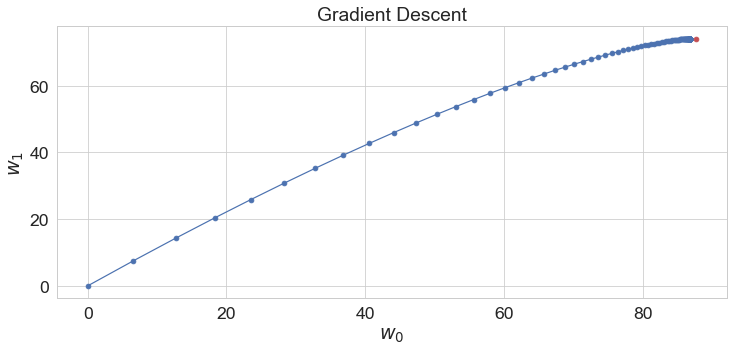

In [8]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(12, 5))
plt.title('Gradient Descent')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.scatter(w_gd[:, 0], w_gd[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_gd[:, 0], w_gd[:, 1]);

### SGD - Стохастический градиентный спуск (Stochastic Gradient Descent)

In [9]:
def StochasticGradientDescent(X, y, alpha=1e-3, min_weight_dist=1e-5, max_iter=1e5, l1=0, l2=0, seed=42):
    '''Реализация стохастического градиентного спуска
    Параметры:
        X (np.array) - массив признаков
        y (np.array) - вектор ответов
        alpha (float) - скорость обучения
        min_weight_dist (float) - критерий сходимости 
            (разница весов, при которой алгоритм останавливается) 
        max_iter (int) - максимальное количество итераций
        l1 (float) - коэффициент L1 регуляризации
        l2 (float) - коэффициент L2 регуляризации
        seed (int) - начальное значение генератора случайных величин
    Возвращаемые значения:
        weights (np.array) - матрица весов на каждой итерации
        errors (np.array) - вектор ошибок на каждой итерации
    '''
    np.random.seed(seed)
    # инициализируем начальный вектор весов
    w = np.zeros(X.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    error_list = [mse(X, w, y)]
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    # количество объектов
    n = X.shape[0]
    # ход стохастического градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        # считаем для одного объекта градиент
        grad = 2 * np.dot(X[ind].T, (np.dot(X[ind], w) - y[ind])) + \
                                        l1 * np.sign(w) + 2 * l2 * w
        # корректируем значения весов
        new_w = w - alpha * grad
        # считаем расстояние между векторами весов
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        error_list.append(mse(X, new_w, y))
        iter_num += 1
        w = new_w

    weigts = np.array(w_list)
    errors = np.array(error_list)
    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Количество итераций - {iter_num}')
    print(f'Веса - {new_w}')
    return weigts, errors

In [10]:
%%time
w_sgd, err_sgd = StochasticGradientDescent(X, y, alpha=0.02, min_weight_dist=1e-3)

В случае использования стохастического градиентного спуска функционал ошибки составляет 29.4016
Количество итераций - 244
Веса - [86.03154329 73.74639899]
Wall time: 35 ms


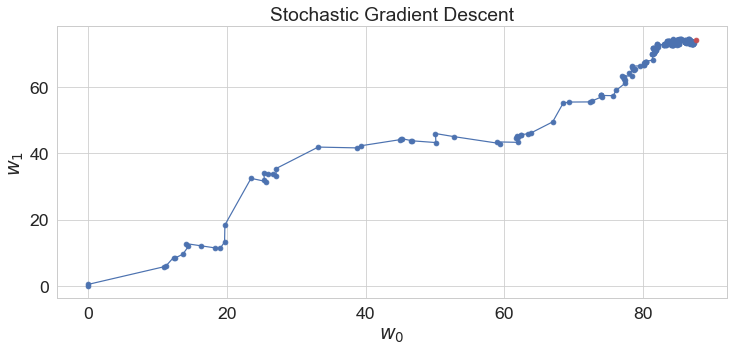

In [11]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(12, 5))
plt.title('Stochastic Gradient Descent')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.scatter(w_sgd[:, 0], w_sgd[:, 1])
plt.plot(w_sgd[:, 0], w_sgd[:, 1])
plt.scatter(coef[0], coef[1], c='r');

### Mini-batch Gradient Descent

In [12]:
def mbGradientDescent(X, y, batch=None, alpha=1e-3, min_weight_dist=1e-5, max_iter=1e5, l1=0, l2=0, seed=42):
    '''Реализация mini-batch градиентного спуска
    Параметры:
        X (np.array) - массив признаков
        y (np.array) - вектор ответов
        batch (int) - количество объектов о одном батче
        alpha (float) - скорость обучения
        min_weight_dist (float) - критерий сходимости 
            (разница весов, при которой алгоритм останавливается) 
        max_iter (int) - максимальное количество итераций
        l1 (float) - коэффициент L1 регуляризации
        l2 (float) - коэффициент L2 регуляризации
        seed (int) - начальное значение генератора случайных величин
    Возвращаемые значения:
        weights (np.array) - матрица весов на каждой итерации
        errors (np.array) - вектор ошибок на каждой итерации
    '''
    np.random.seed(seed)
    # инициализируем начальный вектор весов
    w = np.zeros(X.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    error_list = [mse(X, w, y)]
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций (эпох)
    iter_num = 0
    # счетчик эпох
    epoch_num = 0
    # количество объектов
    n = X.shape[0]
    # если размер батча задан, то считаем количество батчей - n_batch,
    # иначе реализуется градиентный спуск
    if batch:
        n_batch = n // batch
        if n % batch != 0:
            n_batch += 1
    else:
        n_batch = 1
        batch = n
    # ход mini-batch градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        w_last = w.copy() # сохраняем значения весов
        # перемешиваем X и y 
        xy = np.c_[X, y]
        np.random.shuffle(xy)
        X = xy[:, :-1]
        y = xy[:, -1]
        for b in range(n_batch):        
            start_ = batch * b
            end_ = batch * (b + 1)
            X_b = X[start_ : end_, :]
            y_b = y[start_ : end_]
            # считаем градиент по всем объектам батча
            grad = 2 * np.dot(X_b.T, (np.dot(X_b, w) - y_b)) / len(y_b) + l1 * np.sign(w) + 2 * l2 * w
            # корректируем значения весов
            w -= alpha * grad
            w_list.append(w.copy())
            #error_list.append(mse(X, w, y))
            iter_num += 1
        # считаем расстояние между векторами весов
        weight_dist = np.linalg.norm(w_last - w, ord=2)
        #w_list.append(w.copy())
        error_list.append(mse(X, w, y))
        epoch_num += 1
    
    weights = np.array(w_list)
    errors = np.array(error_list)
    print(f'В случае использования mini-batch градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Количество итераций - {iter_num}')
    print(f'Количество эпох - {epoch_num}')
    print(f'Размер батча - {batch}')
    print(f'Веса - {w}')
    return weights, errors

In [13]:
%%time
w_mbgd, err_mbgd = mbGradientDescent(X, y, batch=10)

В случае использования mini-batch градиентного спуска функционал ошибки составляет 28.7649
Количество итераций - 6730
Количество эпох - 673
Размер батча - 10
Веса - [86.84883945 74.10063773]
Wall time: 431 ms


In [14]:
%%time
_,_ = GradientDescent(X, y)

В случае использования градиентного спуска функционал ошибки составляет 28.7649
Количество итераций - 6354
Веса - [86.84614818 74.10128726]
Wall time: 390 ms


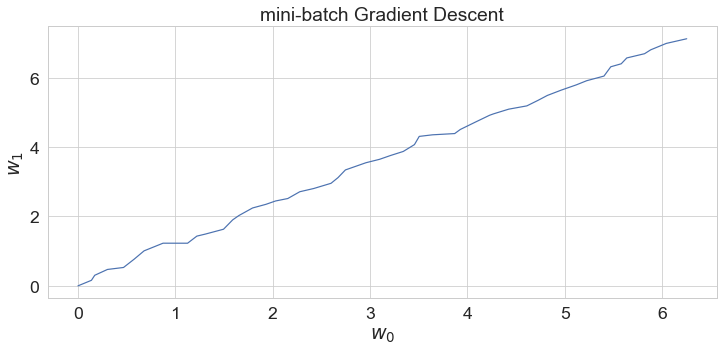

In [15]:
plt.figure(figsize=(12, 5))
plt.title('mini-batch Gradient Descent')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

n = 50 
#n = len(w_mbgd)
#plt.scatter(w_mbgd[:, 0], w_mbgd[:, 1])
plt.plot(w_mbgd[:n, 0], w_mbgd[:n, 1]);
#plt.scatter(coef[0], coef[1], c='r');

### График MSE

Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

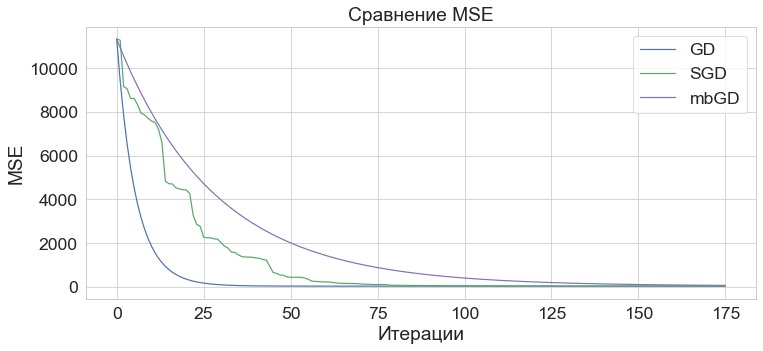

In [16]:
plt.figure(figsize=(12, 5))
plt.title('Сравнение MSE')
plt.ylabel('MSE')
plt.xlabel('Итерации')

n = min(len(err_gd), len(err_sgd), 200)
plt.plot(range(n), err_gd[:n], c='b', label='GD')
plt.plot(range(n), err_sgd[:n], c='g', label='SGD')
plt.plot(range(n), err_mbgd[:n], c='m', label='mbGD')
plt.legend();

## 2 Задание

Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.

В случае использования градиентного спуска функционал ошибки составляет 1538.1839
Количество итераций - 468
Веса - [52.27158274 49.76082106]
В случае использования стохастического градиентного спуска функционал ошибки составляет 1643.3584
Количество итераций - 100000
Веса - [53.6774467  46.41747337]


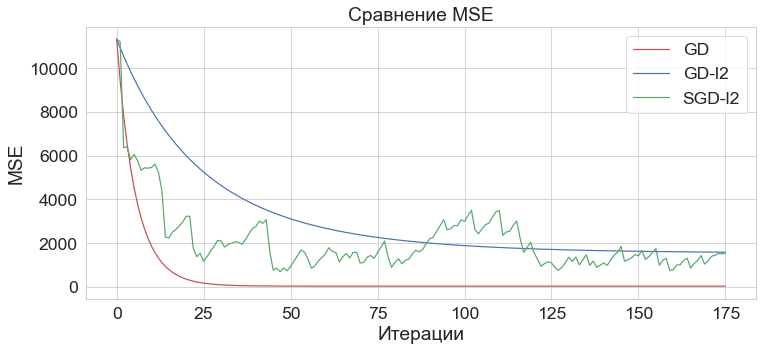

In [17]:
w_gd_l2, err_gd_l2 = GradientDescent(X, y, alpha=0.01, l2=0.5)
w_sgd_l2, err_sgd_l2 = StochasticGradientDescent(X, y, alpha=0.05, min_weight_dist=1e-3, l2=0.5)
n = min(len(err_gd), len(err_gd_l2), len(err_sgd_l2), 200)

plt.figure(figsize=(12, 5))
plt.title('Сравнение MSE')
plt.ylabel('MSE')
plt.xlabel('Итерации')

plt.plot(range(n), err_gd[:n], c='r', label='GD')
plt.plot(range(n), err_gd_l2[:n], c='b', label='GD-l2')
plt.plot(range(n), err_sgd_l2[:n], c='g', label='SGD-l2')
plt.legend();

## 3 Задание

[*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

$$|x|'=\frac{x}{|x|}=sign(x)$$

В случае использования градиентного спуска функционал ошибки составляет 1467.2193
Количество итераций - 754
Веса - [53.81287569 49.60340261]
В случае использования стохастического градиентного спуска функционал ошибки составляет 1347.409
Количество итераций - 100000
Веса - [56.87226698 49.0824233 ]


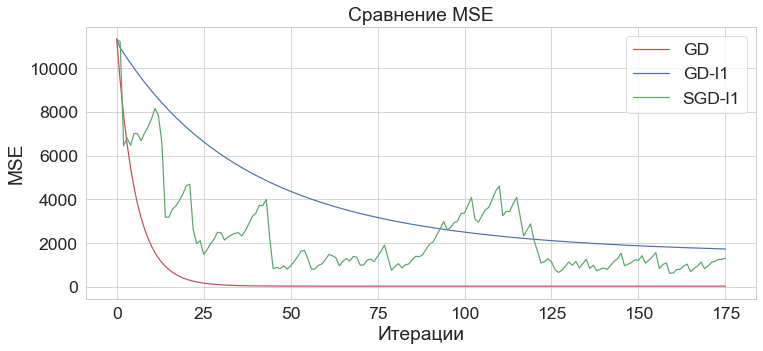

In [18]:
w_gd_l1, err_gd_l1 = GradientDescent(X, y, alpha=0.01, l1=50)
w_sgd_l1, err_sgd_l1 = StochasticGradientDescent(X, y, alpha=0.05, min_weight_dist=1e-3, l1=50)
n = min(len(err_gd), len(err_gd_l1), len(err_sgd_l1), 200)

plt.figure(figsize=(12, 5))
plt.title('Сравнение MSE')
plt.ylabel('MSE')
plt.xlabel('Итерации')

plt.plot(range(n), err_gd[:n], c='r', label='GD')
plt.plot(range(n), err_gd_l1[:n], c='b', label='GD-l1')
plt.plot(range(n), err_sgd_l1[:n], c='g', label='SGD-l1')
plt.legend();

## 4 Задание

[*] Построить график изменения весов от числа итераций при GD и SGD (или mini-batch GD) на одном рисунке.

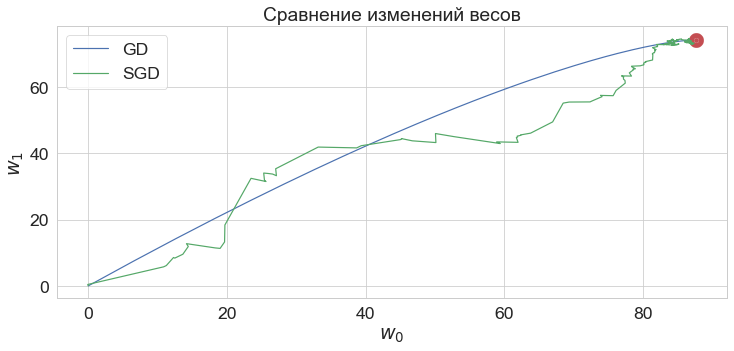

In [19]:
plt.figure(figsize=(12, 5))
plt.title('Сравнение изменений весов')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.plot(w_gd[:, 0], w_gd[:, 1], c='b', label='GD')
plt.plot(w_sgd[:, 0], w_sgd[:, 1], c='g', label='SGD')
#plt.plot(w_mbgd[:, 0], w_mbgd[:, 1], c='m', label='mbGD')
plt.scatter(coef[0], coef[1], linewidth=10, c='r')
plt.legend();


1. Как способ получения (нулевой или нормально распределенный) начального вектора влияет на сходимость алгоритмов?
2. Cкорость сходимости в большей степени определяется правильным подбором шага обучения. С точки зрения количества итераций очевидно, что стохастический градиентный спуск сходится за большее количество итераций. Но зато он может обучаться, используя меньше ресурсов оперативной памяти.
3. Время работы алгоритма зависит от количества итераций, а они от шага обучения.

## 5 Задание

[*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

In [20]:
import sys
import os

# запрещаем вывод функции GradientDescent
old_stdout = sys.stdout # backup current stdout
sys.stdout = open(os.devnull, "w")

w_list_l1 = []
w_list_l2 = []
l_list = []

for l in np.logspace(start=-3, stop=2, num=20):
    l_list.append(l)
    w, _ = GradientDescent(X, y, l1=l)
    w_list_l1.append(w[-1])
    w, _ = GradientDescent(X, y, l2=l)
    w_list_l2.append(w[-1])
w_list_l1 = np.array(w_list_l1)
w_list_l2 = np.array(w_list_l2)

sys.stdout = old_stdout # reset old stdout

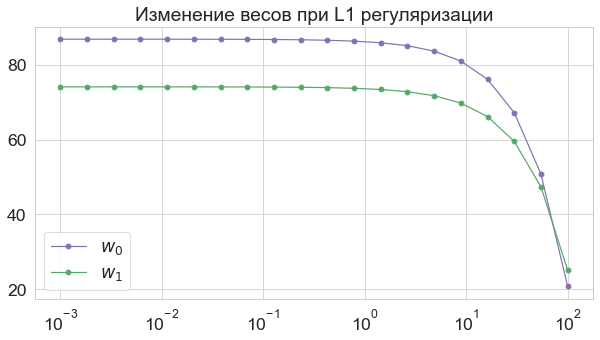

In [21]:
# Визуализируем изменение весов при L1 регуляризации
plt.figure(figsize=(10, 5))
plt.title('Изменение весов при L1 регуляризации')
plt.xscale('log')
plt.plot(l_list, w_list_l1[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, w_list_l1[:, 1], 'go-', label=r'$w_1$')
plt.legend();

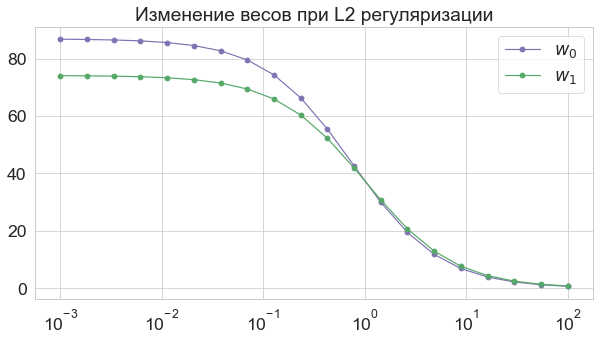

In [22]:
# Визуализируем изменение весов при L2 регуляризации
plt.figure(figsize=(10, 5))
plt.title('Изменение весов при L2 регуляризации')
plt.xscale('log')
plt.plot(l_list, w_list_l2[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, w_list_l2[:, 1], 'go-', label=r'$w_1$')
plt.legend();